In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  # this code, allow us to work with offline plotly version
import plotly.graph_objs as go                         # it's like "plt" of matplot
import plotly.tools as tls                             # It's useful to we get some tools of plotly
from collections import Counter                        # To do counter of some features
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import confusion_matrix

from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/VI/application_train.csv')

In [4]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
#set display max column to see all column
pd.set_option("display.max_columns", None)
pd.get_option("display.max_columns")

#set display max column to see all column
pd.set_option("display.max_rows", 150)
pd.get_option("display.max_rows")

150

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [9]:
df_train.shape

(307511, 122)

In [10]:
#number of type column
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Unique Value

In [11]:
#number of unique classes in each column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Missing data 

In [12]:
def missing_valuesTable(df):
        #total missing values
        missing_val = df.isnull().sum()
        #percentage of missing values
        missing_ValPercent = 100 * df.isnull().sum() / len(df)
        #make a table with the results
        Missing_val_tab = pd.concat([missing_val, missing_ValPercent], axis=1)
        #rename the columns
        missing_val_tableRnm = Missing_val_tab.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        #sort the table by percentage of missing value data
        missing_val_tableRnm = missing_val_tableRnm[
            missing_val_tableRnm.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        #print result
        print ("dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_tableRnm.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return missing_val_tableRnm

In [13]:
missing_valuesTable(df_train).head(10)

dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Check data unbalence

Target 0 = loan is repayed (Good)
Target 1 = load is not repayed(Bad)

In [14]:
df_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [15]:
#percentage target 
print("Percentage (%):")
(df_train["TARGET"].value_counts()/df_train["TARGET"].count())*100

Percentage (%):


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

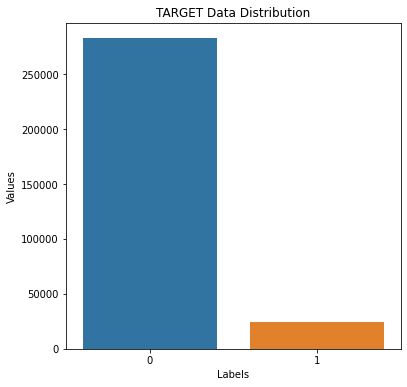

In [16]:
#Viss target distribusi data
temp_df = df_train["TARGET"].value_counts()
df = pd.DataFrame({'Labels': temp_df.index,
                   'Values': temp_df.values})

plt.figure(figsize=(6,6))
plt.title('TARGET Data Distribution')
sns.set_color_codes("pastel")
sns.barplot(x='Labels', y='Values', data=df)
plt.show()

**EDA**

1. Distribution Target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



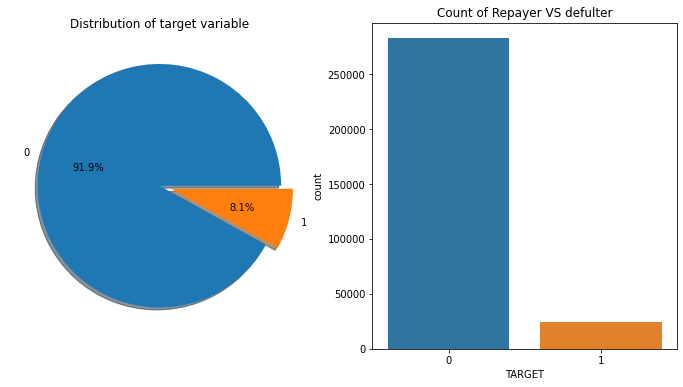

In [17]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df_train.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')
sns.countplot('TARGET',data=df_train,ax=ax[1])
ax[1].set_title('Count of Repayer VS defulter')
plt.show()

2. Distribution Load Type

In [18]:
df_viz = df_train['NAME_CONTRACT_TYPE'].value_counts()
trace = go.Pie(labels=df_viz.index, values=df_viz.values)
data = [trace]
layout = go.Layout(title='Distribution of Loan Type', titlefont=dict(size=22))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

3. Distrubution Gender

In [19]:
df_viz = df_train['CODE_GENDER'].value_counts()
trace = go.Pie(labels=df_viz.index, values=df_viz.values)
data = [trace]
layout = go.Layout(title='Distribution of Gender', titlefont=dict(size=22))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

4. Distribution of Applicant\'s Marital Status

In [20]:
temp = df_train['NAME_FAMILY_STATUS'].value_counts()
trace = go.Bar(x=temp.index, y=temp, 
               marker=dict(color='plum'), opacity=0.6)
data = [trace]
layout = go.Layout(title='Distribution of Applicant\'s Marital Status', titlefont=dict(size=22),
                   xaxis=dict(title='Marital Status',
                              titlefont=dict(size=16),
                              tickfont=dict(size=14)),
                   yaxis=dict(title='Count',
                              titlefont=dict(size=16),
                              tickfont=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

5. Distribution of Applicant Housing Type


In [21]:
temp = df_train['NAME_HOUSING_TYPE'].value_counts()
trace = go.Bar(x=temp.index, y=temp, 
               marker=dict(color='purple'), opacity=0.6)
data = [trace]
layout = go.Layout(title='Distribution of Applicant\'s Housing Type', titlefont=dict(size=22),
                   xaxis=dict(title='Housing Type',
                              titlefont=dict(size=16),
                              tickfont=dict(size=14),
                              tickangle=20),
                   yaxis=dict(title='Count',
                              titlefont=dict(size=16),
                              tickfont=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

6. Distribution of Applicant Education

In [22]:
temp = df_train['NAME_EDUCATION_TYPE'].value_counts()
trace = go.Bar(x=temp.index, y=temp, 
               marker=dict(color='yellow'), opacity=0.6)
data = [trace]
layout = go.Layout(title='Distribution of Applicant\'s Education', titlefont=dict(size=22),
                   xaxis=dict(title='Education',
                              titlefont=dict(size=16),
                              tickfont=dict(size=12),
                              tickangle=0),
                   yaxis=dict(title='Count',
                              titlefont=dict(size=16),
                              tickfont=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

7. Distribution of Applicant\'s Occupation

In [23]:
temp = df_train['OCCUPATION_TYPE'].value_counts()
trace = go.Bar(x=temp.index, y=temp, 
               marker=dict(color='powderblue'), opacity=0.6)
data = [trace]
layout = go.Layout(title='Distribution of Applicant\'s Occupation', titlefont=dict(size=22),
                   xaxis=dict(title='Occupation',
                              titlefont=dict(size=16),
                              tickfont=dict(size=12)),
                   yaxis=dict(title='Count',
                              titlefont=dict(size=16),
                              tickfont=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

8. Applicant's Work Industry

In [24]:
temp = df_train['ORGANIZATION_TYPE'].value_counts().sort_values().tail(20)
trace = go.Bar(x=temp, y=temp.index, orientation='h',
               marker=dict(color='blue'), opacity=0.6)
data = [trace]
layout = go.Layout(title='Distribution of Applicant\'s Work Industry', width = 900, titlefont=dict(size=22),
                   xaxis=dict(title='Count',
                              titlefont=dict(size=16),
                              tickfont=dict(size=14)),
                   yaxis=dict(title='Industry',
                              titlefont=dict(size=16),
                              tickfont=dict(size=12)),
                   margin=dict(l=200))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

9. Income Distribution

In [25]:
#plot distribusi for one feature
def plot_dist(feature, color):
  plt.figure(figsize=(10, 6))
  plt.title("Distribution of %s" % feature)
  sns.distplot(df_train[feature].dropna(),color=color, kde=True,bins=100)
  plt.show()

In [26]:
#plot distrubution of multiple feature with target 1/0
def plot_dist_mult(var, nrow=2):
  i = 0
  t1 = df_train.loc[df_train['TARGET'] !=0]
  t0 = df_train.loc[df_train['TARGET'] ==0]

  sns.set_style('whitegrid')
  plt.figure()
  fig, ax = plt.subplots(nrow, 2, figsize=(12,6*nrow))

  for feature in var:
    i += 1
    plt.subplot(nrow,2,i)
    sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
    sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")
    plt.ylabel('Density Plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs,labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
  plt.show();

In [27]:
df_train['AMT_INCOME_TOTAL'].min(),df_train['AMT_INCOME_TOTAL'].max()

(25650.0, 117000000.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



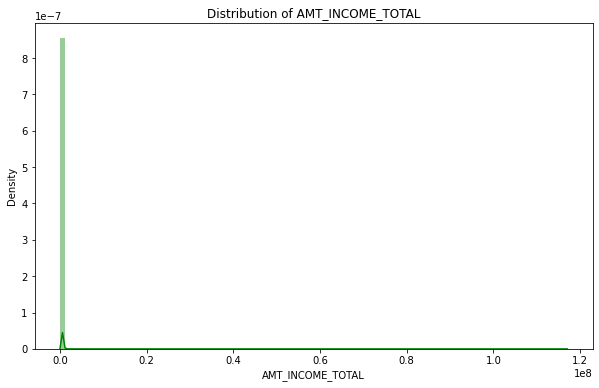

In [28]:
plot_dist('AMT_INCOME_TOTAL', 'green')

10. Credit distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



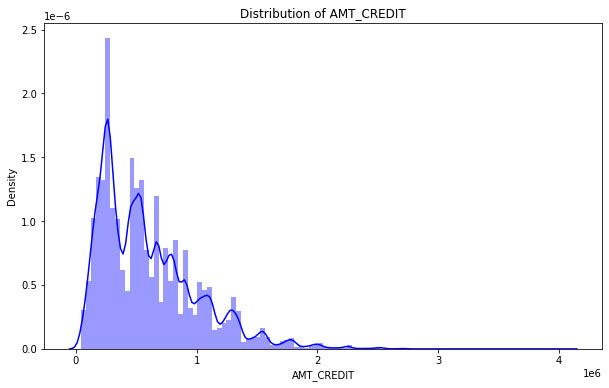

In [29]:
plot_dist('AMT_CREDIT', 'blue')

11. Annuity Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



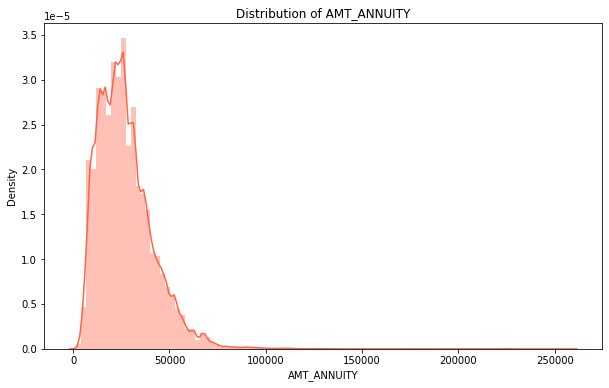

In [30]:
plot_dist('AMT_ANNUITY', 'tomato')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parame

<Figure size 432x288 with 0 Axes>

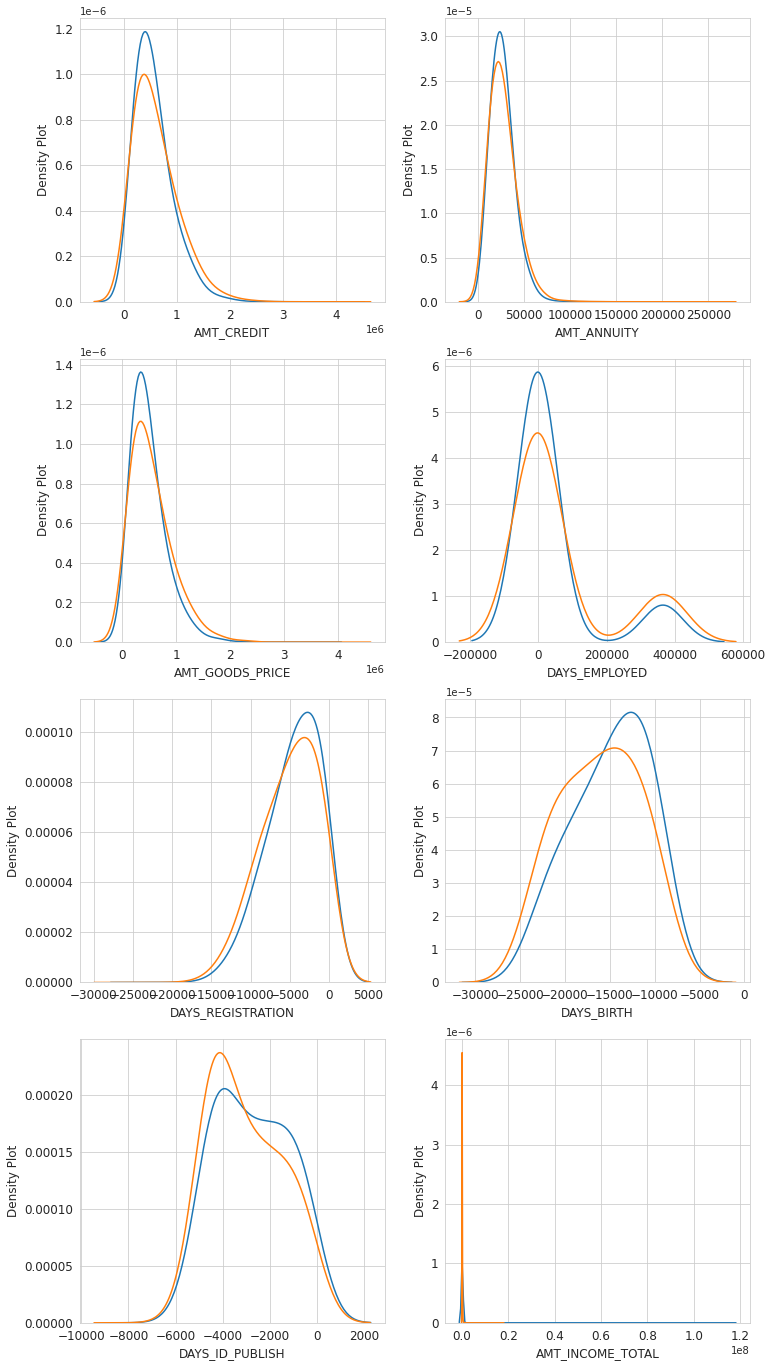

In [31]:
var = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH','AMT_INCOME_TOTAL']
plot_dist_mult(var, nrow=4)

12. Age on Repayment

In [32]:
# Find the correlation of the positive days since birth and target
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

-0.07823930830982694

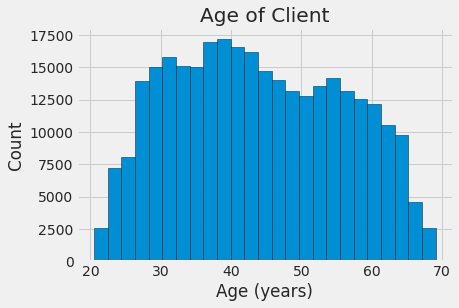

In [33]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

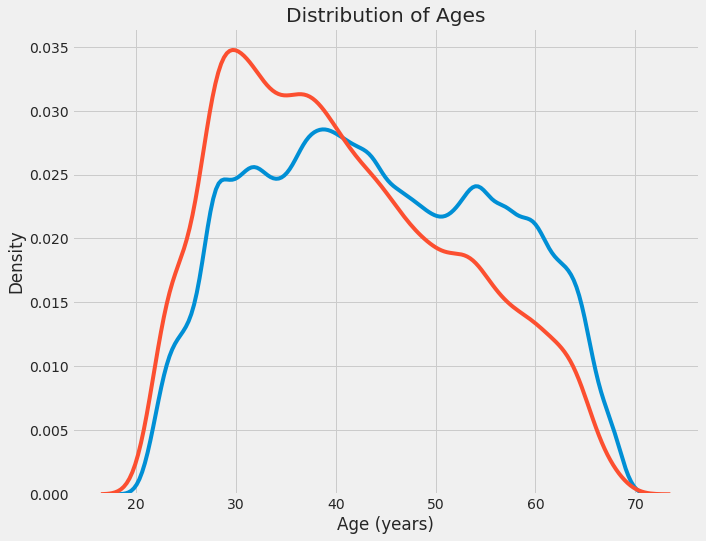

In [34]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [35]:
# Age information into a separate dataframe
age_data = df_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [36]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


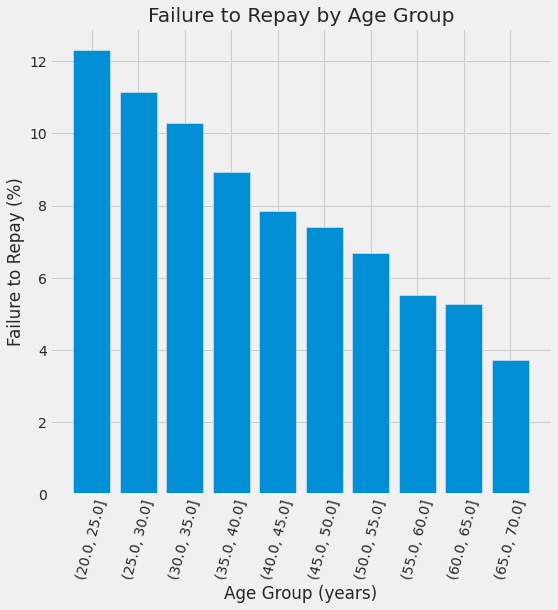

In [37]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

**CORRELATION**

In [38]:
cor = df_train.corr()['TARGET'].sort_values()

#display correlation result
print('Most Positive Correlation:\n', cor.tail(15))
print('\nMost Negative Correlation:\n', cor.head(15))

Most Positive Correlation:
 FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlation:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AM

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3

In [39]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


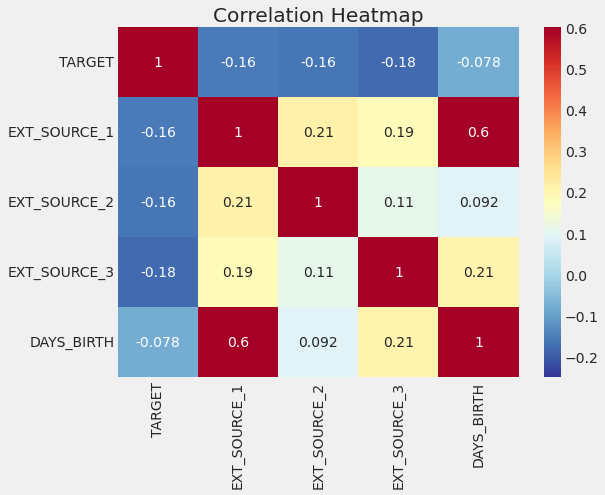

In [40]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

**Handling missing values**

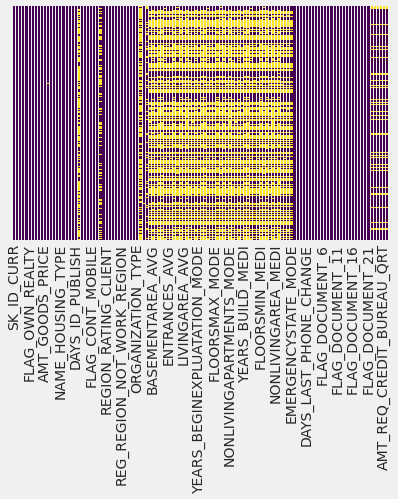

In [41]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
# Missing values statistics
missing_values = missing_valuesTable(df_train)
missing_values.head(40)

dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [43]:
df_train.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [44]:
categorical_missVar = [var for var in df_train.columns if df_train[var].isnull().mean()>0 and
                   df_train[var].dtypes=='O']
categorical_missVar

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [45]:
numeric_missVar = missing_values.index.tolist()
numeric_missvar = [e for e in numeric_missVar if e not in categorical_missVar]
numeric_missvar

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'TOTALAREA_MODE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BURE

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df_train[numeric_missvar] = imputer.fit_transform(df_train[numeric_missvar])

In [47]:
print(df_train['NAME_TYPE_SUITE'].mode())

0    Unaccompanied
dtype: object


In [48]:
df_train['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [49]:
print(df_train['OCCUPATION_TYPE'].mode())

0    Laborers
dtype: object


In [50]:
df_train['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)

In [51]:
print(df_train['FONDKAPREMONT_MODE'].mode())

0    reg oper account
dtype: object


In [52]:
df_train['FONDKAPREMONT_MODE'].fillna('reg oper account',inplace=True)

In [53]:
print(df_train['HOUSETYPE_MODE'].mode())

0    block of flats
dtype: object


In [54]:
df_train['HOUSETYPE_MODE'].fillna('block of flats',inplace=True)

In [55]:
print(df_train['WALLSMATERIAL_MODE'].mode())

0    Panel
dtype: object


In [56]:
df_train['WALLSMATERIAL_MODE'].fillna('Panel',inplace=True)

In [57]:
print(df_train['EMERGENCYSTATE_MODE'].mode()) 

0    No
dtype: object


In [58]:
df_train['EMERGENCYSTATE_MODE'].fillna('No',inplace=True)

In [59]:
df_train.isnull().sum().sum()

0

In [60]:
df_train.shape

(307511, 122)

**ENCODING**

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
                       
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [63]:
# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)

print('Features shape: ', df_train.shape)

Features shape:  (307511, 242)


**Domain Knowledge Features**

In [64]:
df_train['CREDIT_INCOME_PERCENT'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
df_train['ANNUITY_INCOME_PERCENT'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']
df_train['CREDIT_TERM'] = df_train['AMT_ANNUITY'] / df_train['AMT_CREDIT']
df_train['DAYS_EMPLOYED_PERCENT'] = df_train['DAYS_EMPLOYED'] / df_train['DAYS_BIRTH']

In [65]:
df_domain = df_train.copy()

df_domain['CREDIT_INCOME_PERCENT'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
df_domain['ANNUITY_INCOME_PERCENT'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']
df_domain['CREDIT_TERM'] = df_train['AMT_ANNUITY'] / df_train['AMT_CREDIT']
df_domain['DAYS_EMPLOYED_PERCENT'] = df_train['DAYS_EMPLOYED'] / df_train['DAYS_BIRTH']

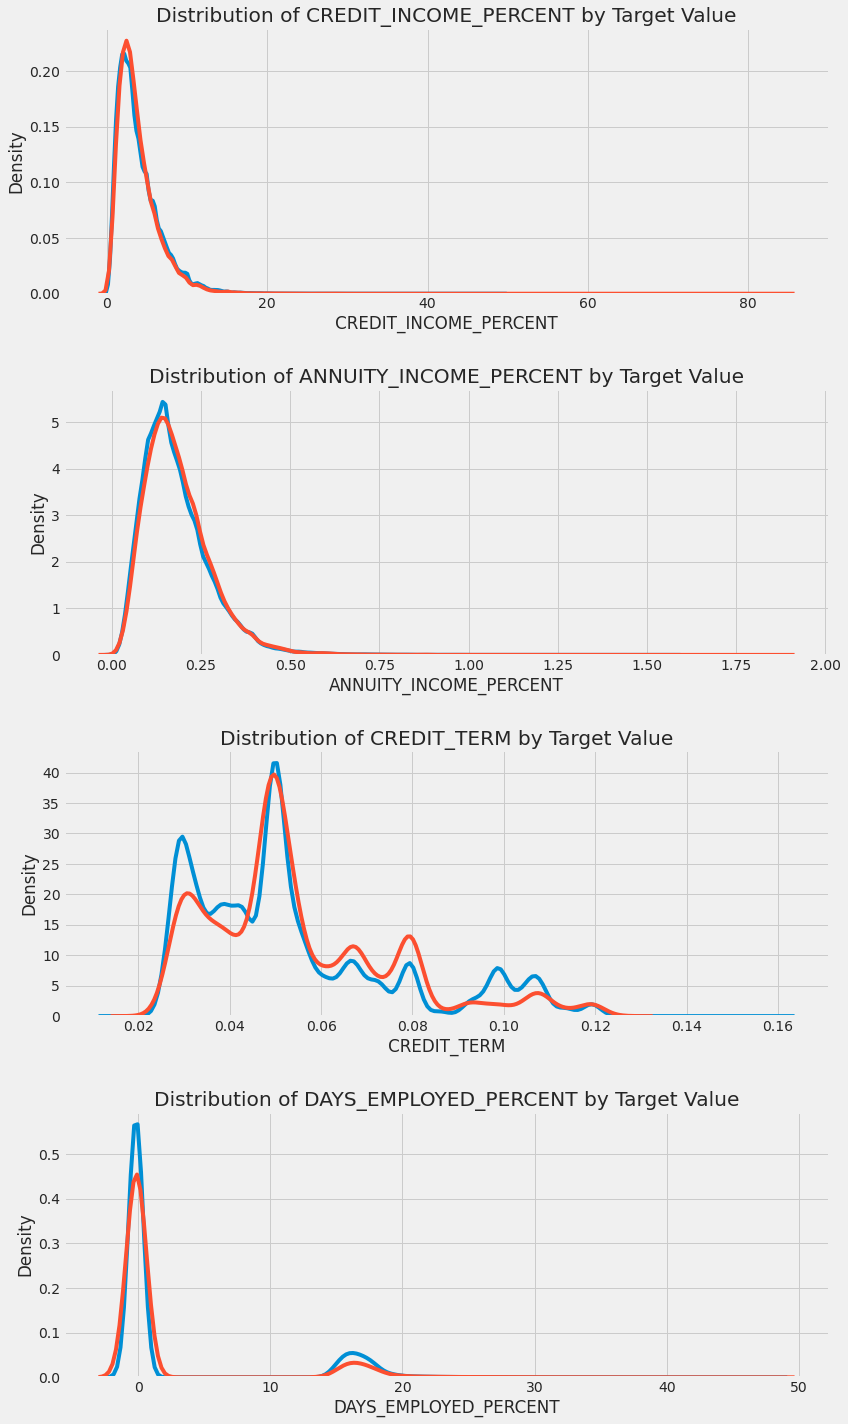

In [66]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_domain.loc[df_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_domain.loc[df_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

**MODELING**

In [67]:
#Determine the number of fraud and valid transactions in the dataset
fraud = df_train[df_train['TARGET']==1]
valid = df_train[df_train['TARGET']==0]
outlier_fraction = len(fraud)/float(len(valid))

print('outlier fraction for the whole dataset:')
print(outlier_fraction)

print("Fraud Cases: {}".format(len(fraud)))
print("Valid Cases: {}".format(len(valid)))

outlier fraction for the whole dataset:
0.08781828601345662
Fraud Cases: 24825
Valid Cases: 282686


In [68]:
from sklearn.model_selection import train_test_split

#Independent and dependent feature
columns = df_train.columns.tolist()
#filter the column to remove data we dont want
columns = [c for c in columns if c not in ["TARGET"]]
#Set the variabel for predicting
target = "TARGET"
#random state
ranState = np.random.RandomState(42)

x = df_train[columns]
y = df_train[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(246008, 245) (246008,)
(61503, 245) (61503,)


More Feature Selection

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [70]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=ranState))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x7F606FE4C050))

In [71]:
sel.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [72]:
selected_feat = x_train.columns[(sel.get_support())].tolist()
len(selected_feat)

60

In [73]:
print(selected_feat)

['SK_ID_CURR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ENTRANCES_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIR

In [74]:
app_x_train = x_train.copy()
app_x_test = x_test.copy()

In [75]:
x_train = x_train[selected_feat]
x_test = x_test[selected_feat]


In [76]:
print(x_train.shape, x_test.shape)

(246008, 60) (61503, 60)


Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(C = 2)

In [78]:
logistic_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=2)

In [79]:
y_pred = logistic_reg.predict(x_test)

In [80]:
log_reg_pred = logistic_reg.predict_proba(x_test)[:, 1]

In [81]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(log_reg_pred, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [82]:
print('AUC Test Proba :', roc_auc_score(y_test, log_reg_pred))

AUC Test Proba : 0.6229028276738727


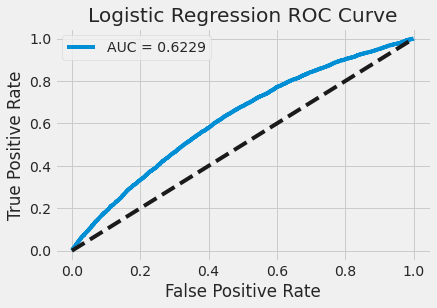

In [83]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()

In [84]:
log_reg_pred

array([0.04945546, 0.06621294, 0.06447276, ..., 0.13058717, 0.09056472,
       0.04051785])

In [86]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [87]:
n_error = (y_pred != y_test).sum()

#classification matrics
print("{}: {}".format("Logistic Regression Errors", n_error))
print("Accuracy matrix:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score is:", roc_auc_score(y_test, y_pred))

Logistic Regression Errors: 4928
Accuracy matrix:
0.9198738272929776
Confusion Matrix:
[[56575     0]
 [ 4928     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56575
           1       0.00      0.00      0.00      4928

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503

ROC AUC Score is: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest - Decision trees

In [89]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators = 100, random_state = ranState, verbose = 1, n_jobs = -1)

In [90]:
randomForest.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x7F606FE4C050,
                       verbose=1)

In [91]:
y_pred = randomForest.predict(x_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


In [92]:
ranFor_pred = randomForest.predict_proba(x_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


In [93]:
print('AUC Test Proba :', roc_auc_score(y_test, ranFor_pred))

AUC Test Proba : 0.7079486165072224


In [94]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(ranFor_pred, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

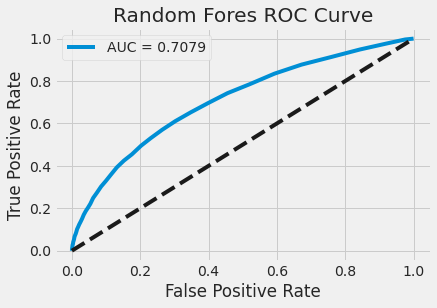

In [95]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Fores ROC Curve')
plt.legend()

In [96]:
n_error = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_error))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 4918
Accuracy Score :
0.9200364209875941
Confusion matrix :
[[56566     9]
 [ 4909    19]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56575
           1       0.68      0.00      0.01      4928

    accuracy                           0.92     61503
   macro avg       0.80      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503

ROC AUC score is:  0.5018482193072062


Extreme Gradient Boost Model

In [97]:
from xgboost import XGBClassifier

In [98]:
xgbClass = XGBClassifier(n_estimators=100, max_depth=5)

In [99]:
xgbClass.fit(x_train, y_train)

XGBClassifier(max_depth=5)

In [100]:
y_pred = xgbClass.predict(x_test)

In [101]:
xgbClass_pred = xgbClass.predict_proba(x_test)[:, 1]

In [102]:
print('AUC Test Proba :', roc_auc_score(y_test, xgbClass_pred))

AUC Test Proba : 0.7584277726526677


In [103]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(xgbClass_pred, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

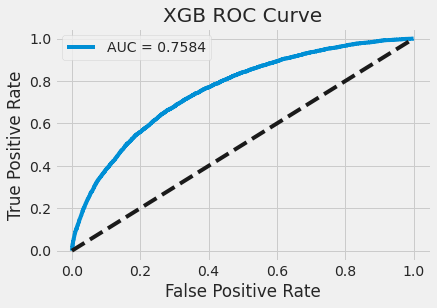

In [104]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ROC Curve')
plt.legend()

In [105]:
n_error = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Extreme Gradient Boost errors",n_error))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Extreme Gradient Boost errors: 4912
Accuracy Score :
0.920133977204364
Confusion matrix :
[[56518    57]
 [ 4855    73]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56575
           1       0.56      0.01      0.03      4928

    accuracy                           0.92     61503
   macro avg       0.74      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503

ROC AUC score is:  0.5069028997681506


In [106]:
from sklearn.metrics import roc_curve, roc_auc_score

Balancing class - RandomOverSampler

In [107]:
from imblearn.over_sampling import RandomOverSampler


In [108]:
os =  RandomOverSampler(sampling_strategy=1)


In [109]:
x_train_res, y_train_res = os.fit_resample(x_train, y_train)

In [110]:
x_train_res.shape,y_train_res.shape

((452222, 60), (452222,))

In [111]:
from collections import Counter

In [112]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 226111, 1: 19897})
Resampled dataset shape Counter({0: 226111, 1: 226111})


Logistic regression

In [113]:
logistic_reg.fit(x_train_res,y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=2)

In [114]:
y_pred = logistic_reg.predict(x_test)

In [115]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Logistic Regression errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Logistic Regression errors: 25603
Accuracy Score :
0.5837113636733168
Confusion matrix :
[[33033 23542]
 [ 2061  2867]]
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.58      0.72     56575
           1       0.11      0.58      0.18      4928

    accuracy                           0.58     61503
   macro avg       0.52      0.58      0.45     61503
weighted avg       0.87      0.58      0.68     61503

ROC AUC score is:  0.5828287014852138


In [116]:
log_reg_pred = logistic_reg.predict_proba(x_test)[:, 1]

In [117]:
print('AUC Test Proba :', roc_auc_score(y_test, log_reg_pred))

AUC Test Proba : 0.6138858098375333


In [120]:
df_actual_pred_log2 = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(xgbClass_pred, columns=['y_pred_proba'])], axis=1)
df_actual_pred_log2.index = y_test.index

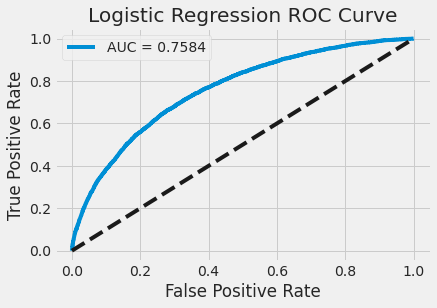

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_pred_log2['y_actual'],df_actual_pred_log2['y_pred_proba'])
auc = roc_auc_score(df_actual_pred_log2['y_actual'], df_actual_pred_log2['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.savefig('rov-log.jpg')
plt.show()

Random forest

In [122]:
randomForest.fit(x_train_res,y_train_res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x7F606FE4C050,
                       verbose=1)

In [123]:
y_pred = randomForest.predict(x_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


In [124]:
randomForest_pred = randomForest.predict_proba(x_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


In [125]:
print('AUC Test Proba :', roc_auc_score(y_test, randomForest_pred))

AUC Test Proba : 0.7254658527784632


In [126]:
df_actual_pred = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(randomForest_pred, columns=['y_pred_proba'])], axis=1)
df_actual_pred.index = y_test.index

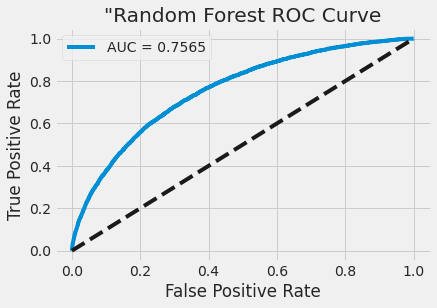

In [139]:
fpr, tpr, tr = roc_curve(df_actual_pred['y_actual'],df_actual_pred['y_pred_proba'])
auc = roc_auc_score(df_actual_pred['y_actual'], df_actual_pred['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('"Random Forest ROC Curve')
plt.legend()
plt.savefig('rov-rf.jpg')
plt.show()

In [128]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 4945
Accuracy Score :
0.9195974180121295
Confusion matrix :
[[56421   154]
 [ 4791   137]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56575
           1       0.47      0.03      0.05      4928

    accuracy                           0.92     61503
   macro avg       0.70      0.51      0.51     61503
weighted avg       0.89      0.92      0.89     61503

ROC AUC score is:  0.5125391371498585


XGBoost

In [129]:
X_train_res = pd.DataFrame(data=x_train_res, columns=selected_feat)

In [130]:
X_train_res.shape

(452222, 60)

In [131]:
xgbClass.fit(x_train_res,y_train_res)

XGBClassifier(max_depth=5)

In [132]:
y_pred = xgbClass.predict(x_test)

In [133]:
xgbClass_pred = xgbClass.predict_proba(x_test)[:, 1]

In [134]:
print('AUC Test Proba :', roc_auc_score(y_test, xgbClass_pred))

AUC Test Proba : 0.7564642491291298


In [135]:
df_actual_pred = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(xgbClass_pred, columns=['y_pred_proba'])], axis=1)
df_actual_pred.index = y_test.index

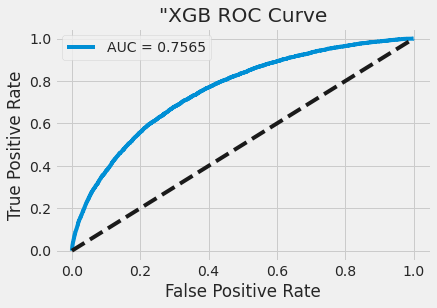

In [140]:
fpr, tpr, tr = roc_curve(df_actual_pred['y_actual'],df_actual_pred['y_pred_proba'])
auc = roc_auc_score(df_actual_pred['y_actual'], df_actual_pred['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('"XGB ROC Curve')
plt.legend()
plt.savefig('rov-xgb.jpg')
plt.show()

In [137]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Extreme Gradient Boost errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Extreme Gradient Boost errors: 18003
Accuracy Score :
0.707282571581874
Confusion matrix :
[[40212 16363]
 [ 1640  3288]]
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     56575
           1       0.17      0.67      0.27      4928

    accuracy                           0.71     61503
   macro avg       0.56      0.69      0.54     61503
weighted avg       0.90      0.71      0.77     61503

ROC AUC score is:  0.6889905509867948
